# Panagiotis Karamitopoulos
# Assignment 9 - Reinforcement Learning

#Question 1

#Install Libraries

In [1]:
!pip install swig

In [2]:
!pip install gymnasium[box2d]

  Using cached box2d-py-2.3.5.tar.gz (374 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for box2d-py: filename=box2d_py-2.3.5-cp312-cp312-linux_x86_64.whl size=2398774 sha256=c59519265a9fa4ddaf216fdb2371bd573d85ae3632958c82b483717ba7fc35b2
  Stored in directory: /root/.cache/pip/wheels/2a/e9/60/774da0bcd07f7dc7761a8590fa2d065e4069568e78dcdc3318
Successfully built box2d-py


In [3]:
!pip install renderlab

In [4]:
!pip install stable-baselines3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.0/188.0 kB 7.1 MB/s eta 0:00:00


#Question 2

#2.1 Reset

Η συνάρτηση αυτή χρησιμοποιείται για την αρχικοποίηση του περιβάλλοντος και καλείται στην αρχή κάθε επεισοδίου. Πιο συγκεκριμένα, επαναφέρει το περιβάλλον στην αρχική του κατάσταση και επιστρέφει την αρχική κατάσταση (observation) και βοηθητικές πληροφορίες (info). Ως αποτέλεσμα, σκοπός της συνάρτησης είναι να ξεκινήσει ένα νέο επεισόδιο ανεξάρτητο από τα προηγούμενα.


#2.2 Step

Η συνάρτηση αυτή δέχεται ως όρισμα μια ενέργεια (action) από τον πράκτορα και επιστρέφει τη νέα κατάσταση του περιβάλλοντος (observation), την ανταμοιβή που λαμβάνει ο πράκτορας (reward), αν το επεισόδιο τελειώσε επιτυχώς ή ανεπυτυχώς (terminated), αν το επεισόδιο έληξε λόγω χρονικού ορίου (truncated) και βοηθητικές πληροφορίες (info). Πρακτικά, η συνάρτηση αυτή υλοποιεί ένα βήμα αλληλεπίδρασης μεταξύ πράκτορα και περιβάλλοντος.


#2.3 Render

Η συνάρτηση αυτή οπτικοποιεί την τρέχουσα κατάσταση του περιβάλλοντος ώστε να παρακολουθείται η συμπεριφορά του πράκτορα.


#Question 3

#3.1 Action Space

Περιλαμβάνει τις εξής ενέργειες:

    0: Καμία ενέργεια.
    1: Ενεργοποίηση του αριστερού κινητήρα.
    2: Ενεργοποίηση του κυρίου κινητήρα.
    3: Ενεργοποίηση του δεξιού κινητήρα.

Οι παραπάνω ενέργειες επηρεάζουν τη θέση, την ταχύτητα και την κλίση του διαστημοπλοίου.

#3.2 Observation Space

Είναι ένα διάνυσμα 8 διαστάσεων, οι οποίες είναι οι εξής:

    1: Η θέση του διαστημοπλοίου ως προς τον άξονα x (συντεταγμένη x).
    2: Η θέση του διαστημοπλοίου ως προς τον άξονα y (συντεταγμένη y).
    3: Η συνιστώσα της γραμμικής ταχύτητας του διαστημοπλοίου ως προς τον άξονα x.
    4: Η συνιστώσα της γραμμικής ταχύτητας του διαστημοπλοίου ως προς τον άξονα y.
    5: Η γωνιακή ταχύτητα του διαστημοπλοίου.
    6: Η γωνία (κλίση) του διαστημοπλοίου.
    7: Λογική τιμή (boolean) που υποδηλώνει αν το πρώτο πόδι του διαστημοπλοίου βρίσκεται σε επαφή με το έδαφος ή όχι.
    8: Λογική τιμή (boolean) που υποδηλώνει αν το δεύτερο πόδι του διαστημοπλοίου βρίσκεται σε επαφή με το έδαφος ή όχι.

Με βάση τα παραπάνω αποφασίζεται η επόμενη ενέργεια του πράκτορα.

#3.3 Reward Function

Μετά από κάθε βήμα απονέμεται μια ανταμοιβή. Αξίζει να σημειωθεί, ότι η συνολική ανταμοιβή ενός επεισοδίου είναι το άθροισμα των ανταμοιβών για όλα τα βήματα εντός αυτού του επεισοδίου. Πιο συγκεκριμένα η ανταμοιβή για κάθε βήμα:


    Αυξάνεται:
    1: όσο πιο κοντά βρίσκεται το διαστημόπλοιο από την προκαθορισμένη περιοχή προσγείωσης.
    2: όσο πιο αργά κινείται το διαστημόπλοιο (μειωμένη ταχύτητα).
    3: κατά 10 πόντους για κάθε πόδι που έρχεται σε επαφή με το έδαφος.
    
    Μειώνεται:
    1: όσο πιο μακριά βρίσκεται το διαστημόπλοιο από την προκαθορισμένη περιοχή προσγείωσης.
    2: όσο πιο γρήγορα κινείται το διαστημόπλοιο (υψηλή ταχύτητα).
    3: όσο περισσότερο γέρνει το διαστημόπλοιο (μη οριζόντια γωνία).
    4: κατά 0,03 πόντους για κάθε καρέ που λειτουργεί ο πλευρικός κινητήρας (δεξιός ή αριστερός).
    5: κατά 0,3 πόντους για κάθε καρέ που λειτουργεί ο κύριος κινητήρας.

    Επιπλέον, το επεισόδιο λαμβάνει επιπλέον ανταμοιβή 100 πόντων αν το διαστημόπλοιο προσγειωθεί ασφαλώς.
    Αντίστοιχα, το επεισόδιο χάνει 100 πόντους αν το διαστημόπλοιο συντριβεί.

Ένα επεισόδιο θεωρείται ως επιτυχής λύση του προβλήματος αν ο αριθμός των πόντων είναι τουλάχιστον 200. Συμπεραίνοντας, η συνάρτηση αυτή έχει σχεδιαστεί ώστε να ενθαρύνει το διαστημόπλοιο να επιτύχει μια πιο ομαλή και αποδοτική προσγείωση.

#Question 4

In [5]:
import renderlab as rl
import gymnasium as gym

env = gym.make("LunarLander-v3", render_mode="rgb_array")
env = rl.RenderFrame(env, "./output")

observation, info = env.reset()

while True:
  action = env.action_space.sample()
  observation, reward, terminated, truncated, info = env.step(action)

  if terminated or truncated:
    break

env.play()

/usr/local/lib/python3.12/dist-packages/moviepy/config_defaults.py:47: SyntaxWarning: invalid escape sequence '\P'
  IMAGEMAGICK_BINARY = r"C:\Program Files\ImageMagick-6.8.8-Q16\magick.exe"
/usr/local/lib/python3.12/dist-packages/moviepy/video/io/ffmpeg_reader.py:294: SyntaxWarning: invalid escape sequence '\d'
  lines_video = [l for l in lines if ' Video: ' in l and re.search('\d+x\d+', l)]
/usr/local/lib/python3.12/dist-packages/moviepy/video/io/ffmpeg_reader.py:367: SyntaxWarning: invalid escape sequence '\d'
  rotation_lines = [l for l in lines if 'rotate          :' in l and re.search('\d+$', l)]
/usr/local/lib/python3.12/dist-packages/moviepy/video/io/ffmpeg_reader.py:370: SyntaxWarning: invalid escape sequence '\d'
  match = re.search('\d+$', rotation_line)
  if event.key is 'enter':



Moviepy - Building video temp-{start}.mp4.
Moviepy - Writing video temp-{start}.mp4



Moviepy - Done !
Moviepy - video ready temp-{start}.mp4


#Question 5

In [6]:
import renderlab as rl
import gymnasium as gym

num_episodes = 5
total_rewards = []

for episode in range(num_episodes):
    env = gym.make("LunarLander-v3", render_mode="rgb_array")
    env = rl.RenderFrame(env, f"./output_episode_{episode+1}")

    observation, info = env.reset()
    score = 0

    while True:
        action = env.action_space.sample()
        observation, reward, terminated, truncated, info = env.step(action)
        score += reward

        if terminated or truncated:
            break

    total_rewards.append(score)

    env.play()

print(f"Averaged Score Random Agent: {sum(total_rewards)/num_episodes:.3f}")


Moviepy - Building video temp-{start}.mp4.
Moviepy - Writing video temp-{start}.mp4



Moviepy - Done !
Moviepy - video ready temp-{start}.mp4


Moviepy - Building video temp-{start}.mp4.
Moviepy - Writing video temp-{start}.mp4



Moviepy - Done !
Moviepy - video ready temp-{start}.mp4


Moviepy - Building video temp-{start}.mp4.
Moviepy - Writing video temp-{start}.mp4



Moviepy - Done !
Moviepy - video ready temp-{start}.mp4


Moviepy - Building video temp-{start}.mp4.
Moviepy - Writing video temp-{start}.mp4



Moviepy - Done !
Moviepy - video ready temp-{start}.mp4


Moviepy - Building video temp-{start}.mp4.
Moviepy - Writing video temp-{start}.mp4



Moviepy - Done !
Moviepy - video ready temp-{start}.mp4


Averaged Score Random Agent: -221.512


#Question 6

#6.1 Import Libraries

In [7]:
from stable_baselines3 import DQN, PPO
import gymnasium as gym
import time
from stable_baselines3.common.monitor import Monitor
import matplotlib.pyplot as plt


  return datetime.utcnow().replace(tzinfo=utc)

Gym has been unmaintained since 2022 and does not support NumPy 2.0 amongst other critical functionality.
Please upgrade to Gymnasium, the maintained drop-in replacement of Gym, or contact the authors of your software and request that they upgrade.
See the migration guide at https://gymnasium.farama.org/introduction/migration_guide/ for additional information.


#6.2 DQN

In [8]:
env = gym.make("LunarLander-v3")
dqn_model = DQN(policy="MlpPolicy", env=env)
dqn_model.learn(total_timesteps=100_000)

  return datetime.utcnow().replace(tzinfo=utc)



#6.3 PPO

In [9]:
env = gym.make("LunarLander-v3")
ppo_model = PPO(policy="MlpPolicy", env=env)
ppo_model.learn(total_timesteps=100_000)

Η εκπαίδευση πραγματοποιήθηκε χωρίς οπτικοποίηση ώστε να επιτευχθεί ταχύτερη σύγκλιση.

#Question 7

In [32]:
def question_7(algo_class, name, num_episodes):
  train_env = Monitor(gym.make("LunarLander-v3"))
  model = algo_class("MlpPolicy", train_env)

  start_time = time.time()
  model.learn(total_timesteps=100_000)
  end_time = time.time()
  training_time = end_time - start_time

  test_env = gym.make("LunarLander-v3")
  rewards = []

  for episode in range(num_episodes):
    observation, info = test_env.reset()
    score = 0

    while True:
      action, _ = model.predict(observation, deterministic=True)
      observation, reward, terminated, truncated, info = test_env.step(action)
      score += reward

      if terminated or truncated:
            break

    rewards.append(score)

  avg_rewards = sum(rewards)/num_episodes
  tr_rewards = train_env.get_episode_rewards()

  return training_time, avg_rewards, tr_rewards

Στη συνάρτηση αυτή, υπολογίζεται ο χρόνος εκπαίδευσης και καταγράφονται τα rewards ανά επεισόδιο κατά την εκπαίδευση. Παράλληλα, υπολογίζεται το μέσο reward σε 5 επεισόδια αξιολόγησης μετά την ολοκλήρωση της εκπαίδευσης.

#7.1 Results

In [33]:
num_episodes = 5
dqn_time, dqn_avg_rewards, dqn_rewards = question_7(DQN, "DQN", num_episodes)
ppo_time, ppo_avg_rewards, ppo_rewards = question_7(PPO, "PPO", num_episodes)
print(f"DQN Time: {dqn_time:.2f}s, Avg Rewards: {dqn_avg_rewards:.2f}")
print(f"PPO Time: {ppo_time:.2f}s, Avg Rewards: {ppo_avg_rewards:.2f}")

DQN Time: 135.76s, Avg Rewards: -130.55
PPO Time: 184.36s, Avg Rewards: 0.58


 Ο DQN εκπαιδεύτηκε σε μικρότερο χρόνο, ωστόσο η απόδοσή του (μέσο reward) ήταν αρκετά χαμηλότερη. Από την άλλη πλευρά, ο PPO αν και απαιτούσε περισσότερο χρόνο εκπαίδευσης, πέτυχε σημαντικά υψηλότερο μέσο reward. Ωστόσο, κανένας αλγόριθμος δεν έχει λύσει το πρόβλημα επιτυχώς, καθώς για να θεωρηθεί μια λύση επιτυχής πρέπει ο αριθμός των πόντων (rewards) να είναι τουλάχιστον 200.

#7.2 Plot Training Time

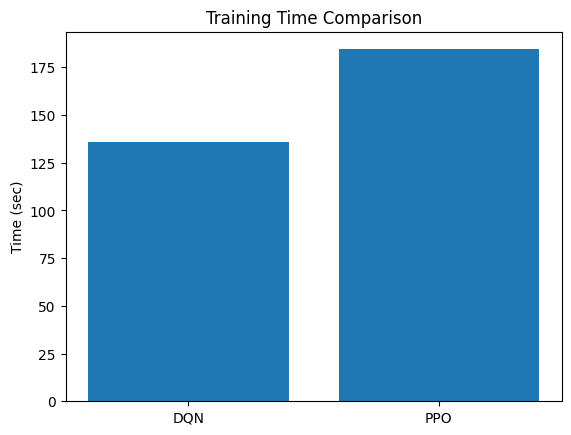

In [34]:
plt.bar(['DQN', 'PPO'], [dqn_time, ppo_time])
plt.ylabel('Time (sec)')
plt.title('Training Time Comparison')
plt.show()

#7.3 Plot Rewards per Episode

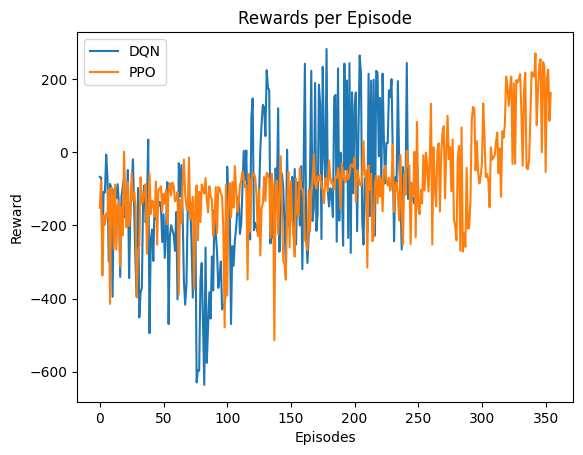

In [35]:
plt.plot(dqn_rewards, label='DQN')
plt.plot(ppo_rewards, label='PPO')
plt.xlabel('Episodes')
plt.ylabel('Reward')
plt.legend()
plt.title('Rewards per Episode')
plt.show()

Από το παραπάνω διάγραμμα, αρχικά παρατηρείται ότι ο DQN  παρουσιάζει πολύ μεγάλες διακυμάνσεις. Ωστόσο, μετά το 110ο επεισόδιο πετυχαίνει αρκετά θετικά και υψηλά rewards. Από την άλλη πλευρά, o PPO παρουσιάζει μια πιο ομαλή ανοδική τάση, αλλά χρειάζεται πολλά περισσότερα επεισόδια για να πετύχει θετικά rewards.


#Question 8

In [44]:
def question_8(algo_class, params, num_episodes):
  train_env = Monitor(gym.make("LunarLander-v3"))
  model = algo_class("MlpPolicy", train_env, **params)

  start_time = time.time()
  model.learn(total_timesteps=400_000)
  end_time = time.time()
  training_time = end_time - start_time

  test_env = gym.make("LunarLander-v3")
  rewards = []

  for episode in range(num_episodes):
    observation, info = test_env.reset()
    score = 0

    while True:
      action, _ = model.predict(observation, deterministic=True)
      observation, reward, terminated, truncated, info = test_env.step(action)
      score += reward

      if terminated or truncated:
            break

    rewards.append(score)

  avg_rewards = sum(rewards)/num_episodes
  tr_rewards = train_env.get_episode_rewards()

  return training_time, avg_rewards, tr_rewards

#8.1 Results

In [47]:
dqn_params = {
    "buffer_size": 50000,
    "learning_starts": 1000,
    "target_update_interval": 250,
}

ppo_params = {
    "n_steps": 1024,
    "batch_size": 64,
    "gamma": 0.999,
    "n_epochs": 4,
}


DQN:
1. buffer_size: Το μέγεθος του buffer ορίστηκε σε 50000, ώστε να αποθηκεύονται 50000 προηγούμενες τιμές (καταστάσεων, ανταμοιβών, ενεργειών) και ο πράκτορας να εκπαιδεύεται τυχαία από αυτές. Με αυτόν τον τρόπο μειώνεται η χρονική συσχέτιση μεταξύ διαδοχικών εμπειριών και βελτιώνεται η σταθερότητα της εκπαίδευσης.
2. learning_starts: Ο πράκτορας επιλέχθηκε να μην ξεκινά αμέσως την εκπαίδευση, αλλά να κινείται τυχαία για τα πρώτα 1000 βήματα ώστε η εκπαίδευση να ξεκινήσει αφού έχει συλλεχθεί μια ποικιλία εμπειριών.
3. target_update_interval: Ανά 250 βήματα οι γνώσεις του κυρίου δικτύου αντιγράφονται στο δίκτυο στόχο. Η επιλογή αυτή παρέχει σταθερότητα, καθώς ο στόχος δεν μεταβάλλεται σε κάθε βήμα.

PPO:
1. n_steps: Ο αριθμός των βημάτων που θα τρέχει ο πράκτορας πριν γίνει ενημέρωση των γνώσεων επιλέχθηκε να είναι 1024. Με αυτόν τον τρόπο, συγκεντρώνεται ένα επαρκές δείγμα στατιστικών που βοηθά στη μείωση του θορύβου.
2. batch_size: Κατά τη διαδικασία της εκπαίδευσης ο αλγόριθμος επεξεργάζεται τα 1024 βήματα σε ομάδες των 64 βημάτων, ώστε να επιτυγχάνεται καλύτερη σύγκλιση.
3. gamma: Επιλέχθηκε μια υψηλή τιμή (0.999), καθώς ο πράκτορας πρέπει να δίνει μεγάλη βαρύτητα στα μελλοντικά rewards.
4. n_epochs: Ο αριθμός των εποχών ορίστηκε σε 4, ώστε σε κάθε πακέτο δεδομένων που συλλέγει ο πράκτορας (n_steps) ο αλγόριθμος να εκτελεί 4 περάσματα βελτιστοποίησης.

In [48]:
num_episodes = 5
dqn_time_opt, dqn_avg_rewards_opt, dqn_rewards_opt = question_8(DQN, dqn_params, num_episodes)
ppo_time_opt, ppo_avg_rewards_opt, ppo_rewards_opt = question_8(PPO, ppo_params, num_episodes)
print(f"DQN Time: {dqn_time_opt:.2f}s, Avg Rewards: {dqn_avg_rewards_opt:.2f}")
print(f"PPO Time: {ppo_time_opt:.2f}s, Avg Rewards: {ppo_avg_rewards_opt:.2f}")

DQN Time: 535.76s, Avg Rewards: 3.19
PPO Time: 530.80s, Avg Rewards: 110.69


Τα αποτελέσματα παρουσιάζουν βελτιωμένη απόδοση σε σχέση με τις προεπιλεγμένες παραμέτρους. Αν και το μέσο reward στον DQN βελτιώθηκε αρκετά, παραμένει πολύ μικρότερο του 200. Από την άλλη πλευρά, ο PPO βελτιώθηκε καλύτερα, καθώς το μέσο reward πλησιάζει περισσότερο στο 200. Συνεπώς, σε αυτήν την περίπτωση τις περισσότερες φορές το διαστημόπλοιο προσγειώνεται με επιτυχία. Αξίζει να σημειωθεί, ότι ο χρόνος εκπαίδευσης μετά την εφαρμογή των επιλεγμένων παραμέτρων κυμαίνεται στα ίδια επίπεδα και για τους δύο αλγορίθμους.

#8.2 Plot Training Time

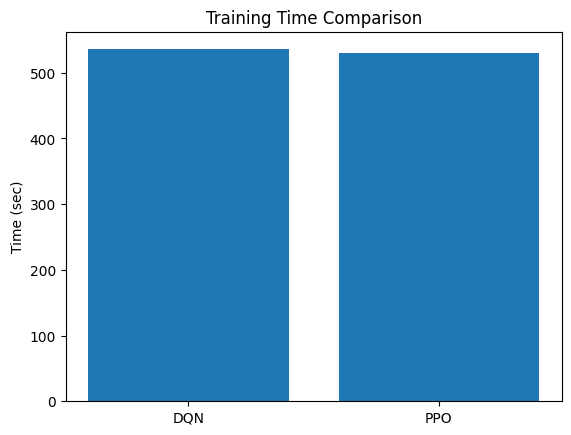

In [49]:
plt.bar(['DQN', 'PPO'], [dqn_time_opt, ppo_time_opt])
plt.ylabel('Time (sec)')
plt.title('Training Time Comparison')
plt.show()

#8.3 Plot Rewards per Episode

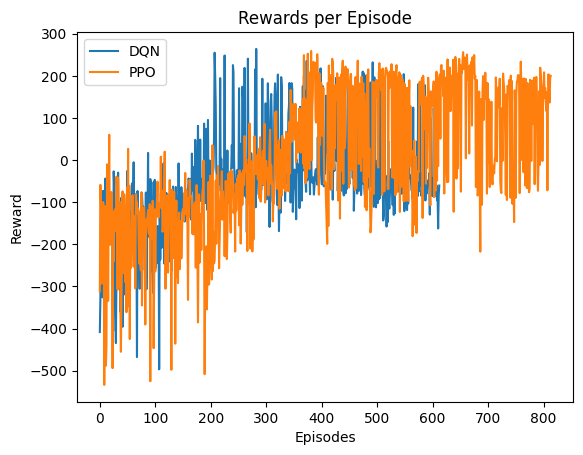

In [50]:
plt.plot(dqn_rewards_opt, label='DQN')
plt.plot(ppo_rewards_opt, label='PPO')
plt.xlabel('Episodes')
plt.ylabel('Reward')
plt.legend()
plt.title('Rewards per Episode')
plt.show()

Από το παραπάνω διάγραμμα, αρχικά παρατηρείται ότι ο DQN  παρουσιάζει και πάλι  μεγάλες διακυμάνσεις. Αν και μετά το 200ο επεισόδιο πετυχαίνονται αρκετά θετικά και υψηλά rewards, παρουσιάζονται συχνές πτώσες σε μεγάλα αρνητικά rewards. Από την άλλη πλευρά, o PPO χρειάζεται 350 περίπου επεισόδια για να πετύχει μεγάλα θετικά rewards.
